In [1]:
from textblob import TextBlob
import math
import pandas as pd
import numpy as np
import os
from pandas import DataFrame
from sklearn.cluster import KMeans
from sklearn import preprocessing
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
style.use('ggplot')
import matplotlib.pylab as plt

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
import sklearn
from sklearn.metrics import mean_squared_error
from wordcloud import WordCloud

In [2]:
tweet= pd.read_csv(u'Donald-Tweets!.csv', index_col=None)

In [3]:
tweet.head(10)

,Date,Time,Tweet_Text,Type,Media_Type,Hashtags,Tweet_Id,Tweet_Url,twt_favourites_IS_THIS_LIKE_QUESTION_MARK,Retweets,Unnamed: 10,Unnamed: 11
0,2016-11-11,15:26:37,Today we express our deepest gratitude to all ...,text,photo,ThankAVet,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,127213,41112,NaN,NaN
1,2016-11-11,13:33:35,Busy day planned in New York. Will soon be mak...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,141527,28654,NaN,NaN
2,2016-11-11,11:14:20,Love the fact that the small groups of protest...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,183729,50039,NaN,NaN
3,2016-11-11,2:19:44,Just had a very open and successful presidenti...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,214001,67010,NaN,NaN
4,2016-11-11,2:10:46,A fantastic day in D.C. Met with President Oba...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,178499,36688,NaN,NaN
5,2016-11-10,19:31:27,Happy 241st birthday to the U.S. Marine Corps!...,text,photo,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,159176,44655,NaN,NaN
6,2016-11-09,11:36:58,Such a beautiful and important evening! The fo...,text,NaN,NaN,7.960000e+17,https://twitter.com/realDonaldTrump/status/796...,627615,225164,NaN,NaN
7,2016-11-09,2:48:27,Watching the returns at 9:45pm.\n#ElectionNigh...,text,photo,ElectionNight;MAGA,7.960000e+17,https://twitter.com/realDonaldTrump/status/796...,185160,45492,NaN,NaN
8,2016-11-09,1:35:15,RT @IvankaTrump: Such a surreal moment to vote...,text,NaN,NaN,7.960000e+17,https://twitter.com/realDonaldTrump/status/796...,99809,17169,NaN,NaN
9,2016-11-08,23:20:39,RT @EricTrump: Join my family in this incredib...,text,NaN,MakeAmericaGreatAgain;VOTE,7.960000e+17,https://twitter.com/realDonaldTrump/status/796...,63868,19710,NaN,NaN


In [4]:
df=tweet['Tweet_Text']


In [5]:
#change the text to str
text=str(df)

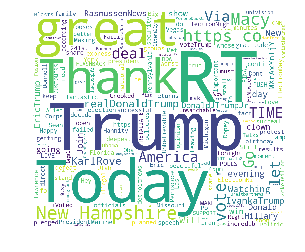

In [6]:
wordcloud = WordCloud(background_color="white",width=1000, height=860, margin=2).generate(text)

import matplotlib.pyplot as plt

plt.imshow(wordcloud)
rcParams['figure.figsize'] = 20, 10

plt.axis("off")

plt.show()

wordcloud.to_file('wordcloud.png')

In [7]:
test=TextBlob(text)

test.sentiment

Sentiment(polarity=0.20195668693009117, subjectivity=0.5995670995670995)

In [8]:
#there are two attributes for sentiment

#The polarity score is a float within the range [-1.0, 1.0]. 
#The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

test.sentiment.polarity

0.20195668693009117

In [9]:
#write a loop to get sentiment from every tweet

#now we want to get the polarity plot:
storage=[]

for i in range(len(df)):
    x=str(df[i])
    y=TextBlob(x)
    z=y.sentiment.polarity
    storage.append(z)


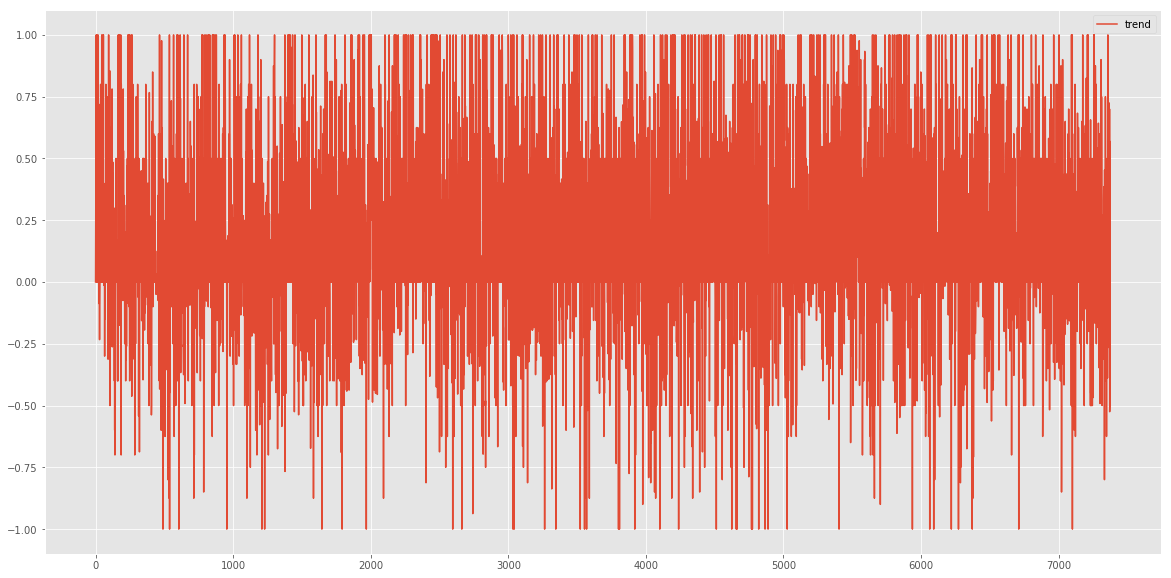

In [10]:
#create new dataframe of the change
change=DataFrame({'trend':storage})

rcParams['figure.figsize'] = 20, 10

#plot the trend of the sentiments (polarity plot)
change.plot.line()

In [11]:
##now we want to get the subjectivity plot:
storage2=[]

for i in range(len(df)):
    x2=str(df[i])
    y2=TextBlob(x2)
    z2=y2.sentiment.subjectivity
    storage2.append(z2)


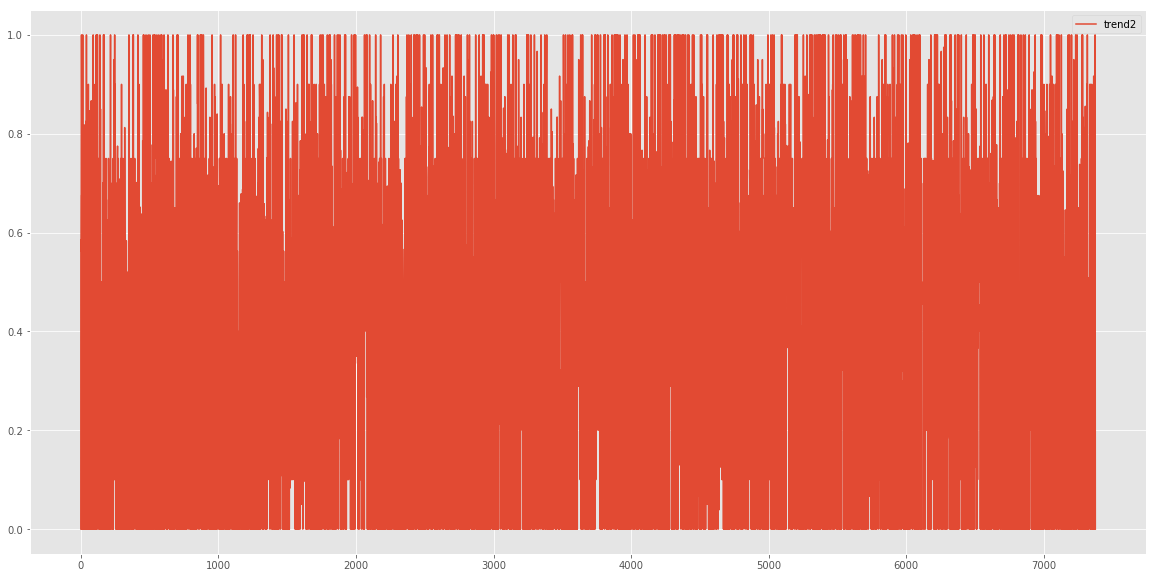

In [12]:
#create new dataframe of the change
change2=DataFrame({'trend2':storage2})

rcParams['figure.figsize'] = 20, 10


#plot the trend of the sentiments (polarity plot)
change2.plot.line()


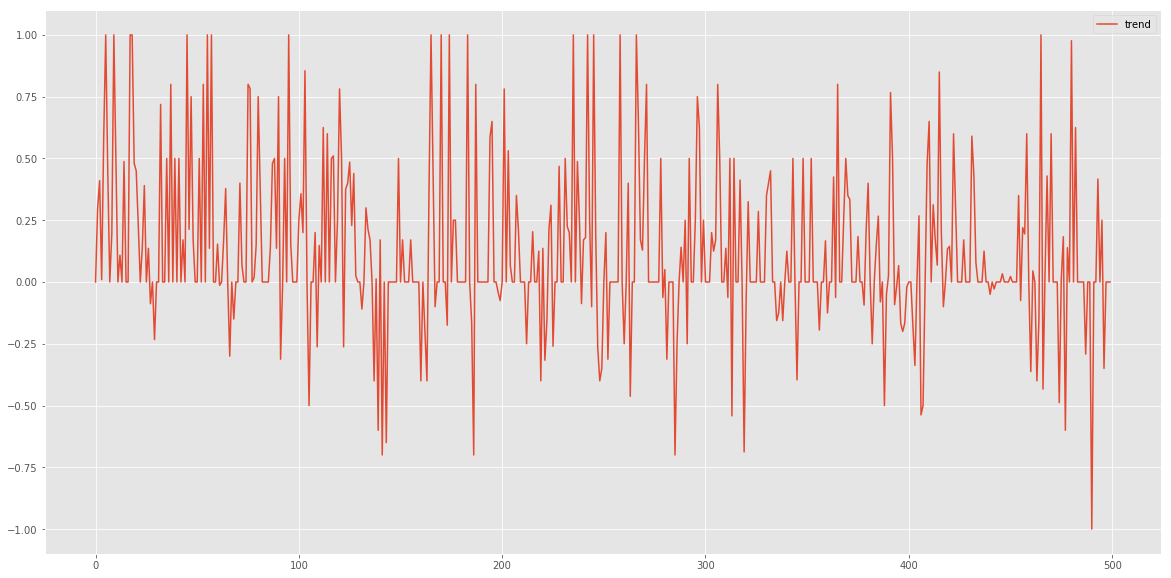

In [13]:

"""
#to zoom in, we want to see the first 500 tweets trends:
"""
#now we want to get the polarity plot:
storage=[]

for i in range(500):
    x=str(df[i])
    y=TextBlob(x)
    z=y.sentiment.polarity
    storage.append(z)

#create new dataframe of the change
change=DataFrame({'trend':storage})

rcParams['figure.figsize'] = 20, 10


#plot the trend of the sentiments (polarity plot)
change.plot.line()

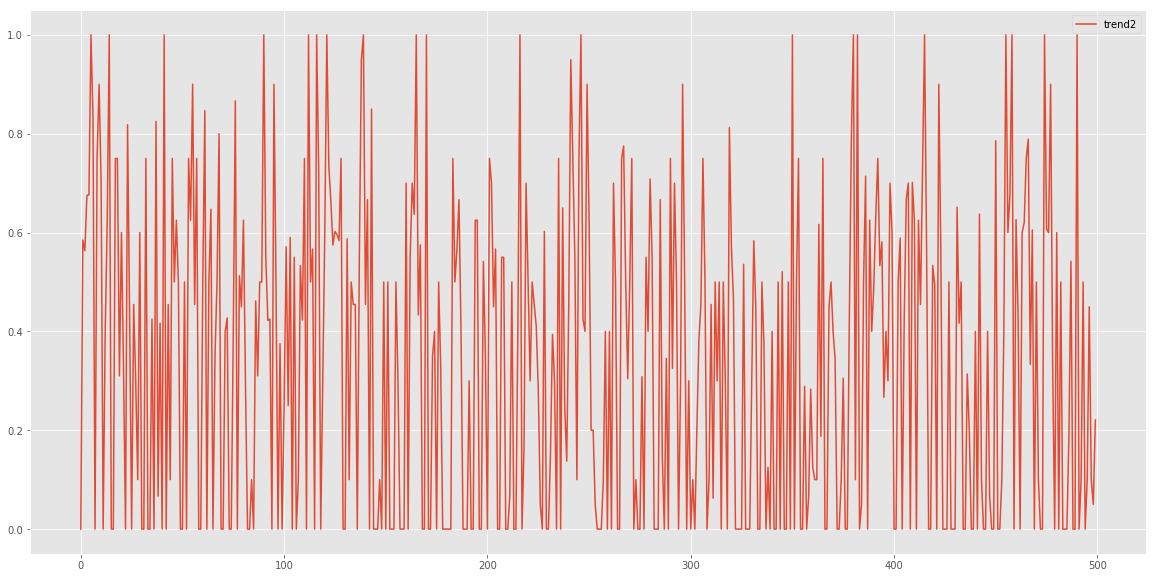

In [14]:
##now we want to get the subjectivity plot:
storage2=[]

for i in range(500):
    x2=str(df[i])
    y2=TextBlob(x2)
    z2=y2.sentiment.subjectivity
    storage2.append(z2)

#create new dataframe of the change
change2=DataFrame({'trend2':storage2})

rcParams['figure.figsize'] = 20, 10

#plot the trend of the sentiments (polarity plot)
change2.plot.line()

# How often does this guy tweet?

In [15]:
data = tweet
time = data['Time']
tweets = data['Tweet_Text']
hashTag = data['Hashtags']
Retweets = data['Retweets']

In [16]:
#first, lets see how offen trump tweets during a single day. Maybe he is nonstop and tweet every 
#hour of the day
hour_an = data.copy()
hour_an['Time'] = pd.to_datetime(data['Time'], yearfirst=True)
hour_an['Time'] = hour_an['Time'].dt.hour
hour_an = pd.DataFrame(hour_an.groupby(['Time']).size().sort_values(ascending=True).rename('Tweets'))
hour_an

,Tweets
Time,
7,29
8,42
6,63
9,84
5,146
10,168
4,222
11,301
17,331


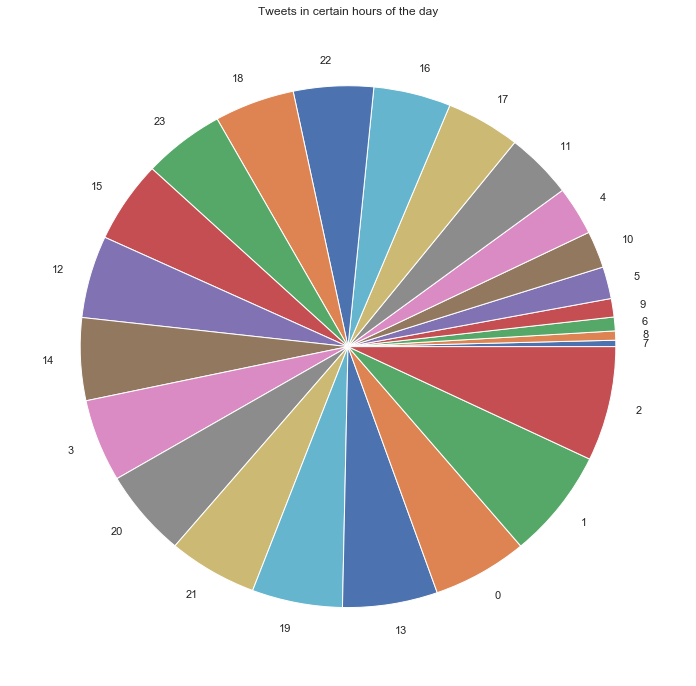

In [27]:
#lets do that in a pie chart
fig, ax = plt.subplots(figsize=(12, 12))
shap = hour_an
labels = hour_an.index.values
ax.pie(shap, labels=labels, shadow=False)
plt.title('Tweets in certain hours of the day')
plt.show()

In [18]:
print("There are a total of {} tweets in the dataset".format(len(tweet)))


There are a total of 7375 tweets in the dataset


In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string
import re
import nltk
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD, Adam
from keras.models import model_from_json
import os

/Users/sureshkumarmukhiya/miniconda3/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "
Using TensorFlow backend.


In [20]:
nltk.download()
sid = SentimentIntensityAnalyzer()


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [21]:
sid

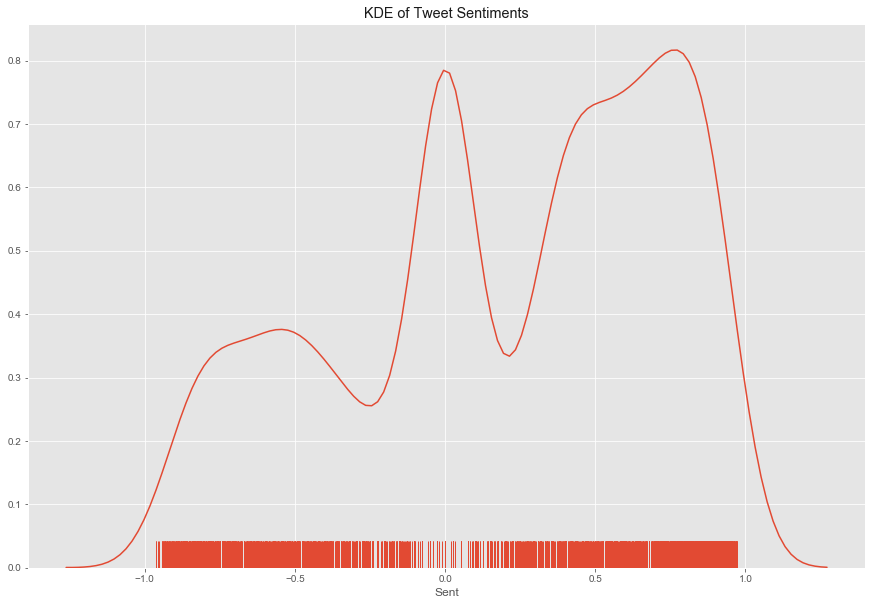

In [22]:
df = pd.read_csv('Donald-Tweets!.csv')
df = df[df['Type'] == 'text'][['Date','Time','Tweet_Text']]
df = df[~df['Tweet_Text'].str.startswith('RT')]
df['Clean'] = df['Tweet_Text'].map(lambda x: re.sub(r'#\S+', '', str(x)))
df['Clean'] = df['Clean'].map(lambda x: re.sub(r'http\S+', '', str(x)))
df['Clean'] = df['Clean'].map(lambda x: re.sub(r'@\S+', '', str(x)))
df['Sent'] = df['Clean'].map(lambda x: sid.polarity_scores(x)['compound'])

plt.figure(figsize=(15,10))
plt.title('KDE of Tweet Sentiments')
plt.xlabel('Sentiment')
sns.set(color_codes=True)
sns.distplot(df['Sent'], hist=False, rug=True)
plt.show()